# Energy Requirements of Silicon Manufacturing

This journal creates a baseline for the energy required to manufacture silicon for PV applications. The processes covered here include silica to MG-Si, MG-Si to polysilicon (siemens and FBR), Cz ingot growth, wafering, and cell processing steps. 



In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 6)

## Silica to MG-Si

After mining cleaning the silica sand to sufficient purity (>95%), the silica sand is mixed with carboniferous materials and undergoes carbothermic reduction to extract the silicon. This is referred to as metallurgical grade silicon, or MG-Si. The carbothermic reduction is generally done in an arc furnace, frequently an electric arc furnace.

In [2]:
cwd = os.getcwd() #grabs current working directory
#skipcols = ['Source', 'Notes','Country']
e_reducesilica_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-silicon-reduceSilicaSi.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [3]:
e_reducesilica_raw.dropna(how='all')

,E_reduce_SilicatoMGSi,Fuel_Prct,Source,Notes
year,,,,
1990,51.34,22.0,"G. J. M. Phylipsen and E. A. Alsema, “Environm...","electrical process, thermal, and GER of carbon..."
1995,13.89,0.0,"R. Dones and R. Frischknecht, “Life-cycle asse...",arc furnace
2004,11.00,0.0,"N. Jungbluth, “Life cycle assessment of crysta...",NaN
2009,12.00,0.0,"B. S. Xakalashe and M. Tangstad, “Silicon proc...",NaN
2016,27.00,56.0,"Chen Z, Ma W, Wu J, Wei K, Yang X, Lv G, Xie K...","also used by Chen 2017, total energy in = elec..."
2017,13.10,0.0,"Chen Z, Ma W, Wei K, Wu J, Li S, Xie K, Lv G. ...","data from chinese arc furnace, 4 mo, median of..."
2020,11.00,0.0,"A. Müller, L. Friedrich, C. Reichel, S. Herceg...","SoSi, modified Seimens, from Ecoinvent3.7, Fth..."
2022,17.40,37.0,"S. M. Heidari and A. Anctil, “Country-specific...","uses Muller electricity as above from PVPS, in..."


Text(0, 0.5, '[kWh/kg]')

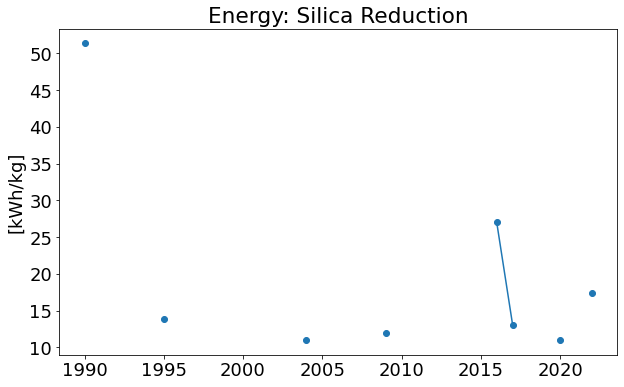

In [4]:
plt.plot(e_reducesilica_raw.index,e_reducesilica_raw.iloc[:,0], marker='o')
plt.title('Energy: Silica Reduction')
plt.ylabel('[kWh/kg]')

Two of the energy points are higher than the others, 1990 from Phylipsen and Alsema, and 2016 from Chen et al. From Phylipsen and Alsema, the note explains that 51.34 kWh/kg is the sum of direct process energy (13 kWh/kg) and the primary energy demand of the carbon inputs+carbon electrodes (11.4kWh/kg). Similarly, Chen et al 2016 has 27 kWh/kg as the sum of electricity plus carbon inputs+carbon electrodes. Our current method is to capture only the electricity or thermal process energy (natural gas/methane) in the energy flows. 

The final datapoint from Heidari and Anctil also includes electricity plus carbon; they use the 2020 Muller/PVPS electricity value of 11 kWh/kg.

Therefore, we will adjust the values for these sections down to just the electricity numbers.

In [5]:
e_reducesilica_raw.loc[1990,['E_reduce_SilicatoMGSi']] = 13.0 #Phylipsen Alsema
e_reducesilica_raw.loc[2016,['E_reduce_SilicatoMGSi']] = 12.0 #Chen Fig. 2
e_reducesilica_raw.loc[2022,['E_reduce_SilicatoMGSi']] = 11.0 #Heidari Anctil

Text(0, 0.5, '[kWh/kg]')

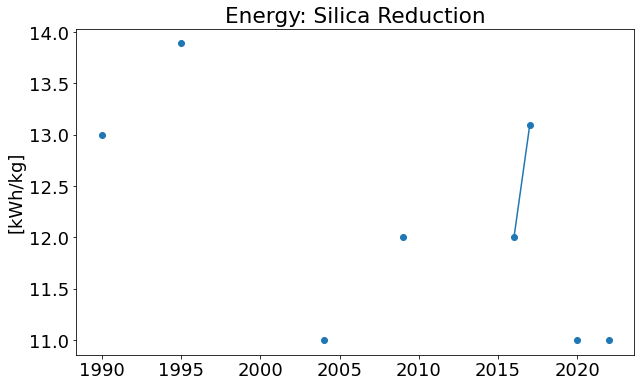

In [6]:
plt.plot(e_reducesilica_raw.index,e_reducesilica_raw.iloc[:,0], marker='o')
plt.title('Energy: Silica Reduction')
plt.ylabel('[kWh/kg]')

Literature values for electric arc furnaces range from 11-13 kWh/kg of MG-Si. Chen et al 2017 notes that while electric arc furnaces in EU countries have energy demands around 11 kWh/kg, Chinese arc furnaces average around 13.1 kWh/kg. The marketshare of Chinese MG-Si has increased in the last decade, as documented in Heidari and Anctil 2022 (derived from USGS 2020, Figure 3.D) between 2005 and 2018.

Pre 2005, we will do a linear interpolation between 1990 values and 2005 values.

2005-2018, we will do a marketshare weighting of RoW = 11 kWh/kg and China = 13 kWh/kg.

2018 through 2030, we will do a linear interpolation down to 11 kWh/kg, assuming continued improvement.

In [9]:
#Pre-2005
#take average of pre 2005 value
e_reducesilica = pd.DataFrame(index=range(1990,2031))
e_reducesilica.loc[1990,['E_reduceSilicatoMGSi']] #= e_reducesilica_raw.loc[:1995,['E_reduce_SilicatoMGSi']].dropna(how='all').mean()
#e_reducesilica.head(2)

KeyError: "None of [Index(['E_reduceSilicatoMGSi'], dtype='object')] are in the [index]"

In [ ]:
#2005-2018
mrktshr_mgsi_region = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-silicon-marketshareMGSiProdRegion.csv", index_col='year')
mrktshr_mgsi_region['MarketShare_RoW_MGSi'] = 1.0-mrktshr_mgsi_region['MarketShare_Chinese_MGSi']
mrktshr_mgsi_region['MarketShare_Chinese_MGSi']*=13 #multiply by kWh/kg China
mrktshr_mgsi_region['MarketShare_RoW_MGSi']*=11 #multiply by kWh/kg RoW
mrktshr_mgsi_region.sum(axis=1) #sum weighted kWh/kg

In [ ]:
#2018-2030


In [ ]:
e_batchglass_trim = e_batchglass_raw.loc[1995:,['E_batchingGlass_kWhpkg','Prct_Fuel_batch']]

In [ ]:
e_batchglass_trim['E_batchingGlass_kWhpkg']=avg_batch_e
e_batchglass_trim['Prct_Fuel_batch']=0.0
e_batchglass_trim.head(5)

## Melting

The next step in glass manufacturing is the melting of the glass. This is seperated out in the literature from the forming, although the process is usually continuous. This step also involves a significant quantity of methane gas heating. We will note this important aspect in our accounting as a fraciton of the total energy neede for each step.

In [ ]:
cwd = os.getcwd()
#skipcols = ['Source', 'Notes','Country']
e_meltrefine_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-glass-meltrefine.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [ ]:
e_meltrefine_raw.dropna(how='all')

In [ ]:
e_meltrefine_raw.loc[2019,'Notes']

One of the fractions of methane is lower than the others. This is M. Zier, P. Stenzel, L. Kotzur, and D. Stolten, “A review of decarbonization options for the glass industry,” Energy Conversion and Management: X, vol. 10, p. 100083, Jun. 2021, doi: 10.1016/j.ecmx.2021.100083. and the energy was adjusted by the overall energy carrier for glass manufacturing in Germany. This may not be representative of the whole world, and it may also include more than just the melting step. Given that the other years are all in agreement, and the 77% is an average since the 1990s, we will remove this value and use the previous datapoint (95% from Worrell).

In [ ]:
e_meltrefine = e_meltrefine_raw.copy()
e_meltrefine.loc[2019,'Prct_Fuel_melt'] = np.nan

#previous version used the average of all values, but this cause the fraction to rise again.
#e_meltrefine.loc[2019,'Prct_Fuel'] = round(e_meltrefine.loc[:,'Prct_Fuel'].mean(),0) 
#e_meltrefine.loc[2019,'Prct_Fuel']

Now we'll examine the energy totals.

In [ ]:
plt.plot(e_meltrefine.index,e_meltrefine.iloc[:,0], marker='o')
plt.title('Energy: Melt and Refine Glass')
plt.ylabel('[kWh/kg]')

The 1980 value is much lower than the 1997 value. This data point is from H. L. Brown, Energy Analysis of 108 Industrial Processes. The Fairmont Press, Inc., 1996. (note the publication date and the data date are not the same). and the noted batch size is a few pounds, meaning this is potentially a different scale of glass manufacturing than we are considering. Additionally, we only need to go back to 1995, therefore, we will drop this datapoint, and back propogate the 1997 data.

In [ ]:
e_meltrefine_subrange = e_meltrefine.loc[1995:,['E_melt_refine_total_kWhpkg','Prct_Fuel_melt']]


Now we will interpolate to create a complete data set for history. It will hold the edge values constant forward and backward.

In [ ]:
e_meltrefine_filled = e_meltrefine_subrange.interpolate(limit_direction='both')

In [ ]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Melting and Refining Energy [kWh/kg]', color='blue') 
ax1.plot(e_meltrefine_filled.index,e_meltrefine_filled.iloc[:,0], color='blue') 
ax1.set_ylim(0,4)
ax1.set_xlim(1995,2025)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy provided by Methane [%]', color='red')
ax2.plot(e_meltrefine_filled.index,e_meltrefine_filled.iloc[:,1], color='red')  
ax2.set_ylim(80,100)

plt.title('Energy: Melt & Refine Glass')

plt.show()

In [ ]:
e_meltrefine_filled.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output_energy_glass_meltrefine.csv")

## Forming
The next step in flat glass formation is forming the flat plate from the melt. There are many ways to do this; float glass entails the molten glass to drop into and float on a bath of molten tin; Rolled glass is drawn through cooled rollers. We will use these two processes interchangably here due to a lack of data.

In [ ]:
cwd = os.getcwd()
#skipcols = ['Source', 'Notes','Country']
e_glassform_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-glassforming.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [ ]:
e_glassform_raw.dropna(how='all')

In [ ]:
plt.plot(e_glassform_raw.index,e_glassform_raw['E_Glassforming_kWhpkg'], marker='o')
plt.title('Energy of Forming Flat glass')
plt.xlabel('[kWh/kg]')

Like the previous set of data, the 1980 datapoint seems unreasonably low, and we know this might potentially be a smaller scale than the other data. Therefore, we will exclude it and perform the same interpolation for the needed time range.

In [ ]:
e_glassform = e_glassform_raw.loc[1995:,['E_Glassforming_kWhpkg','Prct_Fuel_form']]
e_glassform_filled = e_glassform.interpolate(limit_direction='both')

In [ ]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('[kWh/kg]', color='blue') 
ax1.plot(e_glassform_filled.index,e_glassform_filled.iloc[:,0], color='blue') 
ax1.set_ylim(0,1)
ax1.set_xlim(1995,2025)

#right axis
#ax2 = ax1.twinx()
#plt.ylabel('Fraction of Energy provided by Methane [%]', color='red')
#ax2.plot(e_glassform_filled.index,e_glassform_filled.iloc[:,1], color='red')  
#ax2.set_ylim(0,2)

plt.title('Energy for Forming Flat Glass')

plt.show()


In [ ]:
e_glassform_filled.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output_energy_glass_formflat.csv")

## Post Forming: Anneal and Temper

All PV flat glass for c-Si PV is tempered for safety reasons, and all tempered glass has already been annealed. Therefore, we will account for both the energy to anneal and temper the flat glass.

For Bifacial PV technology, the glasses are actually NOT tempered. They are heat treated instead. LOOK INTO DIFFERENCES IN THIS ENERGY DEMAND.

In [ ]:
cwd = os.getcwd()
#skipcols = ['Source', 'Notes','Country']
e_glass_annealtemper_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/energy-input-glass-postforming.csv",
                                     index_col='year')#, usecols=lambda x: x not in skipcols)

In [ ]:
e_glass_annealtemper_raw.dropna(how='all')

In [ ]:
e_glass_annealtemper_raw.loc[1997,'Notes']

In [ ]:
plt.plot(e_glass_annealtemper_raw.index,e_glass_annealtemper_raw['E_GlassTempering_kWhpkg'], marker='o')
plt.title('Energy of Annealing and Tempering Flat glass')
plt.xlabel('[kWh/kg]')

Once again, the 1980 datapoint seems excessively low and will therefore be excluded.

The jump between 1997 and 2001 data seems unlikely to be a trend and more attributable to differing methods of calculating the energy requirements. The modern datapoint falls between these two points. Therefore, like for the batching energy, we wil take an average of these 3 points and use that for all time. 

In [ ]:
e_glass_annealtemper_trim = e_glass_annealtemper_raw.loc[1995:,['E_GlassTempering_kWhpkg','Prct_fuel_annealtemper']]

In [ ]:
avg_annealtemper_e = e_glass_annealtemper_trim.iloc[:,0].mean()
avg_prctfuel_annealtemper = e_glass_annealtemper_trim.iloc[:,1].mean()
e_glass_annealtemper_trim['E_GlassTempering_kWhpkg']= avg_annealtemper_e
e_glass_annealtemper_trim['Prct_fuel_annealtemper']= avg_prctfuel_annealtemper
e_glass_annealtemper_trim.head(5)

## Combine All MFG energy

For the energy baseline to match up with the mass baseline, we are separating the energy demands into virgin material, transport, and manufacturing energy. This journal covers the Manufacturing energy, batch processing through forming and cutting. The following calculation sum all the energies associate with manufacturing at the flat glass facility.

To track the use of methane/natural gas in the processing, we will do a weighted average percent fuel column to accompany the total energy value.

In [ ]:
dfs = [e_batchglass_trim, e_meltrefine_filled, e_glassform_filled, e_glass_annealtemper_trim]
energies_mfg_glass = pd.concat(dfs, axis=1, keys = ['batch','melt','form','anneal'])
energies_mfg_glass.head(5)

In [ ]:
#Sum the manufacturing energies
energies_mfg_glass['sum','E_mfg_glass_kWhpkg'] = energies_mfg_glass.filter(like='E_').sum(axis=1)
energies_mfg_glass.head(5)

In [ ]:
#Take weighted average of PRCT Fuel by energy step
wting_factors = energies_mfg_glass.filter(like='E_')
wting_factors = wting_factors.div(energies_mfg_glass['sum','E_mfg_glass_kWhpkg'], axis=0)
#wting_factors.drop('E_mfg_glass_kWhpkg', axis=1, inplace=True)
wting_factors.head(5)

In [ ]:
fuel_fraction = energies_mfg_glass.filter(like='Prct_')
fuel_fraction.columns.levels[0]

In [ ]:
#drop the column name levels to leave the process steps, allowing multiplication
wting_factors.columns = wting_factors.columns.droplevel(1)
fuel_fraction.columns = fuel_fraction.columns.droplevel(1)

In [ ]:
wtd_fuel_fraction = wting_factors.mul(fuel_fraction, axis = 1) #multiply fraction of energy/step * PRCT Fuel fraction
wtd_fuel_fraction['sum'] = wtd_fuel_fraction.sum(axis=1) #sum the fuel fraction

In [ ]:
e_mfg_glass_output = pd.concat([energies_mfg_glass['sum','E_mfg_glass_kWhpkg'], wtd_fuel_fraction['sum']], axis=1)
e_mfg_glass_output.columns=['E_mfg_glass_kWhpkg','Prct_fuel']
e_mfg_glass_output.head(5)

In [ ]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Manufacturing Energy [kWh/kg]', color='blue') 
ax1.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,0], color='blue') 
ax1.set_ylim(0,5)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy provided by \n Natural Gas (Methane) [%]', color='red')
ax2.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,1], color='red')  
ax2.set_ylim(75,100)

plt.title('Energy and Fuel to Manufacture Flat Glass')

plt.show()

In [ ]:
fig, ax1 = plt.subplots() 
#left axis
ax1.set_ylabel('Manufacturing Energy [kWh/kg]', color='blue') 
ax1.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,0], color='blue') 
ax1.set_ylim(0,5)
ax1.set_xlim(1995,2025)

#right axis
ax2 = ax1.twinx()
plt.ylabel('Fraction of Energy provided by \n Natural Gas (Methane) [%]', color='red')
ax2.plot(e_mfg_glass_output.index,e_mfg_glass_output.iloc[:,1], color='red')  
ax2.set_ylim(75,100)

plt.title('Energy and Fuel to Manufacture Flat Glass')

plt.show()

In [ ]:
e_mfg_glass_output.to_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/output_energy_glass_MFG_FUEL.csv")